# Bibliotecas,  Funções, e Diretórios

In [8]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from joblib import dump

In [9]:
# função para imprimir/plotar métricas de avalialção do modelo
def classification_metrics(estimator):
    
    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))


    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))

In [10]:
# Especeficação dos caminhos das pastas
dataset = 'model/keypoint_classifier/keypoint_dataset.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_svm.joblib'

# Obtendo os dados

In [11]:
# Upload dos dados
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [12]:
# Separação dos dados em amostra de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_dataset,
                                                    y_dataset, 
                                                    test_size = 0.25, 
                                                    random_state = 42, 
                                                    stratify= y_dataset
                                                   )

# Estimando o Modelo

In [13]:
# Criando pipe para processar dados e selecionar modelo SVM
pipe_svc = Pipeline([("svc", SVC(random_state = 42))])

# Criando grid de parâmetros para otimização
param_grid_svc = {"svc__kernel" : ["rbf", "poly"],
                  "svc__C"      : np.logspace(-2, 2, 5),
                  "svc__gamma"  : np.logspace(-2, 2, 5)}

# Criando amostras para cross-validation
splitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Otimização dos parâmetros
grid_svc = GridSearchCV(estimator = pipe_svc,
                       param_grid = param_grid_svc,
                       scoring    = "f1_weighted",
                       cv         = splitter,
                       verbose    = 10,
                       n_jobs     = -1
                       )

# Estimação do modelo
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__kernel': ['rbf', 'poly']},
             scoring='f1_weighted', verbose=10)

# Avaliação do modelo


Métricas de avaliação de treino:
[[253   0   0   0]
 [  0 286   0   0]
 [  0   0 781   0]
 [  0   0   7 501]]


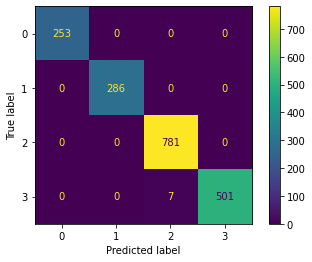

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       286
           2       0.99      1.00      1.00       781
           3       1.00      0.99      0.99       508

    accuracy                           1.00      1828
   macro avg       1.00      1.00      1.00      1828
weighted avg       1.00      1.00      1.00      1828


Métricas de avaliação de teste:
[[ 79   2   3   1]
 [  1  94   0   0]
 [  0   1 259   0]
 [  1   0   2 167]]


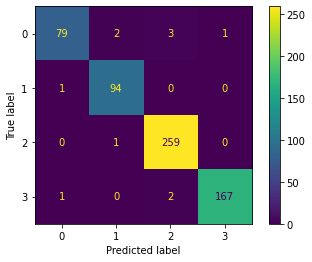

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        85
           1       0.97      0.99      0.98        95
           2       0.98      1.00      0.99       260
           3       0.99      0.98      0.99       170

    accuracy                           0.98       610
   macro avg       0.98      0.97      0.98       610
weighted avg       0.98      0.98      0.98       610



In [14]:
# Métricas de classificação
classification_metrics(grid_svc)

# Disponibilizando o modelo

In [15]:
# Salvando modelo para inferência
dump(grid_svc, model_save_path)

['model/keypoint_classifier/keypoint_classifier_svm.joblib']